# Un premier exemple de reseau de neurones
On utilise ici un réseau de neurones pour essayer de prédire la valeur d'une grandeur appelée 'sgs_p' à partir de la connaissance d'autres grandeurs 'rho','tempe','press','rhoe','gradrho', 'gradt', 'gradp','gradroe','laprho','laprhoe','inv1','inv2','inv3' au nombre de 13.
    
Les analyses présentes dans cette feuille sont très inspirées du tutoriel Tensorflow suivant
- https://www.tensorflow.org/tutorials/keras/regression


### Chargement des modules nécessaires.
#### A chaque fois que vous rencontrer un module (s'appelant module_name) qui n'est pas disponible, la commande à privilégier est:
pip install module_name
#### Un exemple ci-dessous. A noter qu'il faut relancer le kernel à chaque installation (arc de cercle à côté de executer)

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import sys
import datetime, os
from sklearn import metrics
from sklearn import preprocessing


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.3.0


### Load the data

In [3]:
column_names = ['sgs_p','rho','tempe','press','rhoe',
                'gradrho', 'gradt', 'gradp','gradroe','laprho','laprhoe','inv1','inv2','inv3']
raw_dataset = pd.read_csv('data.dat', names=column_names,
                      sep=" ",nrows = 10000)

data = raw_dataset.copy()

data.columns = ['sgs_p','rho','tempe','press','rhoe',
                'gradrho', 'gradt', 'gradp','gradroe','laprho','laprhoe','inv1','inv2','inv3']

data.tail()

,sgs_p,rho,tempe,press,rhoe,gradrho,gradt,gradp,gradroe,laprho,laprhoe,inv1,inv2,inv3
9995,2062.674369,214.186243,603.039587,807455.791561,1.024755e+08,1.573469,0.255108,4.880774,7.257374,0.812712,6.506697,-7.325871,-1.488997,2.215375
9996,3485.668908,228.788276,603.776988,835946.474500,1.095309e+08,1.633268,0.304959,4.904232,7.317506,0.313785,6.006867,7.098354,-1.637823,2.394515
9997,-224.301228,248.937361,604.768929,871444.938809,1.192818e+08,1.626778,0.243557,4.842251,7.310843,-0.905359,-6.593516,-6.848084,-1.569881,2.206274
9998,-5695.295152,270.430300,605.641321,904173.625667,1.296643e+08,1.588239,0.111388,4.736355,7.271386,-1.247304,-6.934520,7.189285,-1.362889,1.808459
9999,-10254.514792,290.611690,606.235810,930064.134966,1.393697e+08,1.589404,0.016541,4.666225,7.271338,-1.334996,-7.020500,7.261982,-1.067305,1.228701


### Normalization of input data

In [4]:
x = data.values #returns a numpy array
#scaler = preprocessing.MinMaxScaler()
scaler = preprocessing.StandardScaler()
x_scaled = scaler.fit_transform(x)

                          
data = pd.DataFrame(x_scaled)
data.columns = ['sgs_p','rho','tempe','press','rhoe',
                'gradrho', 'gradt', 'gradp','gradroe','laprho','laprhoe','inv1','inv2','inv3']
data.tail()

,sgs_p,rho,tempe,press,rhoe,gradrho,gradt,gradp,gradroe,laprho,laprhoe,inv1,inv2,inv3
9995,0.097784,-0.716074,-0.942000,-0.748789,-0.717837,0.494740,1.081111,1.262590,0.497256,0.597887,0.863976,-1.020403,-0.973945,1.430293
9996,0.185565,-0.591395,-0.719340,-0.523976,-0.592961,0.661310,1.243676,1.340896,0.664708,0.165694,0.789254,0.796361,-1.130888,1.555410
9997,-0.043294,-0.419354,-0.419821,-0.243867,-0.420377,0.643234,1.043444,1.133994,0.646151,-0.890383,-1.094420,-0.960224,-1.059240,1.423937
9998,-0.380787,-0.235838,-0.156400,0.014386,-0.236615,0.535882,0.612443,0.780502,0.536276,-1.186591,-1.145398,0.807814,-0.840958,1.146090
9999,-0.662035,-0.063521,0.023107,0.218682,-0.064835,0.539126,0.303150,0.546398,0.536142,-1.262554,-1.158252,0.816970,-0.529252,0.741168


# Split the data into train and test

Now split the dataset into a training set and a test set.

We will use the test set in the final evaluation of our model.


In [5]:
train_dataset = data.sample(frac=0.75,random_state=0)
test_dataset = data.drop(train_dataset.index)
test_dataset.tail()

,sgs_p,rho,tempe,press,rhoe,gradrho,gradt,gradp,gradroe,laprho,laprhoe,inv1,inv2,inv3
9969,-0.129788,-0.076584,-0.170003,0.179373,-0.077300,0.284060,0.127875,0.253593,0.281528,0.450814,0.836230,-1.194332,-0.828907,1.146485
9972,1.296888,-0.469922,-0.639007,-0.337086,-0.470136,-0.293324,-0.372771,-0.029512,-0.300232,1.362840,0.994449,0.991752,-0.866093,-0.175755
9982,0.116220,0.629836,0.704827,0.806383,0.634457,-0.003949,-0.606656,-0.983241,-0.007691,-1.098118,-1.130586,0.835856,0.629626,-1.037413
9985,-0.295429,-0.047623,-0.056219,0.222719,-0.046196,0.855086,0.843714,0.909378,0.857671,0.323513,0.818159,0.873551,-0.236120,0.582750
9995,0.097784,-0.716074,-0.942000,-0.748789,-0.717837,0.494740,1.081111,1.262590,0.497256,0.597887,0.863976,-1.020403,-0.973945,1.430293


### Build the model

Let's build our model. Here, we'll use a Sequential model with one densely connected hidden layer, and an output layer that returns a single, continuous value. The model building steps are wrapped in a function, build_model.


In [6]:
train_labels = train_dataset.pop('sgs_p')
test_labels = test_dataset.pop('sgs_p')
test_labels.tail()

9969   -0.129788
9972    1.296888
9982    0.116220
9985   -0.295429
9995    0.097784
Name: sgs_p, dtype: float64

In [7]:
train_labels = np.asarray(train_labels)
test_labels = np.asarray(test_labels)
train_dataset = np.asarray(train_dataset)
test_dataset = np.asarray(test_dataset)

### Here we construct a very simple network constituted of 3 layers
The first layer has 10 neurons, the second one has 10 neurons and the last one only one since we want to predict a single value (sgs_p)

In [8]:


def build_model():
    from tensorflow import keras
    from tensorflow.keras import layers
    from tensorflow.keras.layers import LeakyReLU

    model = keras.Sequential([
    layers.Dense(10, use_bias=True,activation='relu', input_shape=[train_dataset.shape[1]]),    
    layers.Dense(10, use_bias=True,activation='relu'),     
    layers.Dense(1, use_bias=True,activation='linear'),
    ])

    return model

In [9]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                140       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________


### Define training routine for the model

Train the model for 100 epochs (unless it does not improve any more), and record the training and validation accuracy 

In [10]:
def train_model():
  
    
  optimizer = tf.optimizers.Adam() #

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mse'])

# The patience parameter is the amount of epochs to check for improvement
  early_stop = keras.callbacks.EarlyStopping(monitor='val_mse',min_delta=1e-17, patience=10)
  logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1,profile_batch=0)


  model.fit(train_dataset, 
            train_labels, 
            epochs=100,
            batch_size=1000,
            validation_split = 0.5, 
            verbose=0, 
            callbacks=[early_stop,tensorboard_callback])

In [11]:
#Check that everything is fine
example_batch = train_dataset[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.15903726],
       [-0.03456995],
       [-0.0567122 ],
       [-0.16241279],
       [ 0.10812283],
       [-0.71082306],
       [ 0.8408665 ],
       [-0.03226262],
       [-0.05729589],
       [ 0.15562636]], dtype=float32)

### Train the model and monitor

In [12]:
# Load the TensorBoard notebook extension to follow ANN training
%reload_ext tensorboard

#### Il se peut que tensorboard ne soit pas disponible. Dans ce cas il faudra l'installer à l'extérieur de jupyter
#### Sur mac: brew install tensorboard
#### Sur Linux: apt-get install tensorboard
Il faudra probablement aussi taper dans un terminal (à l'extérieur de jupyter donc) la commande 'tensorboard --logdir logs' pour lancer tensorboard

In [13]:
#Check results using tensorboard
%tensorboard --logdir logs
#Train model
train_model()

Reusing TensorBoard on port 6007 (pid 5363), started 0:03:24 ago. (Use '!kill 5363' to kill it.)

### Make predictions

Finally, predict SGS values using data in the testing set:

#### Model evaluation function

In [14]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features).flatten()
    #R2
    R2=metrics.r2_score(test_labels, predictions)
    #Correlation entre predictions et vraies donnees
    Correl=np.corrcoef(test_labels, predictions)[0, 1]
    print('Model Performance:')
    print('Correlation: {:0.4f}.'.format(Correl))
    print('R2: {:0.4f}.'.format(R2))

#### Visualization of model predictions function

In [15]:
def visualize(model, test_features, test_labels):
    X_test=test_labels
    Y_pred=model.predict(test_features).flatten()
    Y_test=test_labels
    plt.scatter(Y_test,Y_pred, color = 'red',marker=".")
    plt.scatter(Y_test,Y_test, color = 'black',marker=".")
    plt.title('ANN Regression Results')
    plt.xlabel('sgs_exact')
    plt.ylabel('sgs_model')
    plt.show()

Model Performance:
Correlation: 0.5672.
R2: 0.3066.


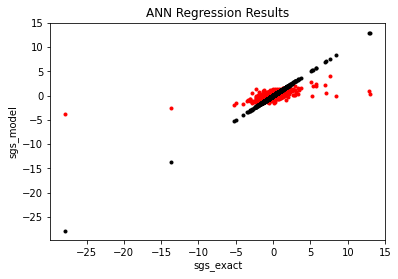

In [16]:
evaluate(model, test_dataset, test_labels)
visualize(model, test_dataset, test_labels)